In [3]:
import scipy as sp
import numpy as np
import scipy.sparse as sps
import scipy.sparse.linalg as spla

import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Лабораторная работа 2. SVD

## 1. Волшебные невязки (2 балла)

Сгенерируйте командой `scipy.linalg.hilbert` матрицу Гильберта размера $500\times500$. Назовём эту матрицу $A$. 

Возьмите вектор $z = (0,0,\ldots,0,1)\in\mathbb{R}^{500}$. Вычислите $b = Az$ и решите систему уравнений $Ax = b$ вашим любимым способом.

Теперь исказите вектор $b$ небольшой (по модулю не большей $0.0001$ по каждой координате) случайной ошибкой и для полученного вектора $b'$ решите систему $Ax = b'$ тем же самым способом.

Сравните невязки $||A\hat{x} - b||_2$ и $||A\hat{x}' - b'||_2$, где $\hat{x}$ и $\hat{x}'$ - полученные вами решения. Попробуйте объяснить эффект.

**Важно!** Баллы будут ставиться не за реализацию, а за объяснения!

In [22]:
z = np.zeros([500])
z[499] = 1
A = sp.linalg.hilbert(500)
b = A.dot(z)
x = sp.linalg.solve( A, b)
print('original b: ', sp.linalg.norm(A.dot(x) - b))
delta = np.random.random_sample(500) * 0.0001
b_ = b + delta
x_ = sp.linalg.solve( A, b_)
print('distorted b: ', sp.linalg.norm(A.dot(x_) - b_))
print(sp.linalg.norm(sp.linalg.inv(A)) * sp.linalg.norm(A))

original b:  3.346277201135163e-16
distorted b:  0.08005455218107949
1.95789176502e+20


*С таким числом обусловленности иной погрешности и быть не могло.*

## 2. Неожиданно теоретическая задача (2 балла)

Для двух заданных матриц $A$ и $B$ одного размера найдите ортогональную матрицу $Q$, для которой норма Фробениуса разности $||QA - B||_F$ минимальна.

**Решение**  $||QA - B||_F^{2} = tr((QA - B)^T(QA - B)) = tr((A^TQ^T - B^T)(QA - B)) = [Q - ортогональная, tr(M) = tr(M^T)] = tr(A^TA) + tr(B^TB) - 2tr(A^TQ^TB)$. Для минимизации исходного условие потребуем максимизации $tr(A^TQ^TB)$.
$tr(A^TQ^TB) = tr(BA^TQ^T) = [используем\space svd-разложение\spaceдля\spaceматрицы\space BA^T = U\Sigma V^T] = tr(U\Sigma V^TQ^T) = tr(V^TQ^TU\Sigma)$.
Теперь у нас имеется след произведения ортогональной матрицы и диагональной (так как $BA^T$ - квадратная). Очевидно, что след - сума произведений соответствующих диагональных элементов.Значит на диагонали ортогональной матрицы должны быть единички (больше нельзя). Значит $V^TQ^TU = E$, откуда получим, что $Q = UV^T$.

## 3. Сжатие информации с помощью SVD (3 балла)

Загрузите выложенную на странице курса фотографию вашего любимого куратора Сони.

Поскольку фотография чёрно-белая, её можно проинтерпетировать как матрицу, элементы которой - это насыщенность серого цвета каждого из пикселей. Постройте сингулярное разложение этой матрицы (не нужно центрировать данные!). 

Визуализуйте первую главную компоненту. Ожидали ли вы увидеть именно это? Почему?

Визуализуйте компонеты с первой по двадцатую, с первой по пятидесятую, с двадцатой по сотую, с двадцатой по последнюю. Сделайте выводы.

Как вам кажется, сколько первых компонент нужно взять для достаточно хорошего восстановления исходного изображения? Во сколько раз меньше памяти потребуется для их хранения? Как изменится результат, если сначала вы центрируете данные?

**Важное замечание.** Главные компоненты - это не скрытые признаки, а матрицы вида $u^{(i)}\sigma_i(v^{(i)})^T$, где $u^{(i)}, v^{(i)}$ --- столбцы матриц $U$ и $V$ соответственно. В частности, сумма первых нескольких главных компонент --- это наилучшее приближение исходной матрицы матрицей данного ранга.

### Решение

Загрузим изображение

In [43]:
from PIL import Image
from scipy import misc


img = misc.imread(r'sonysmall.jpg', mode='L') # это матрица из интенсивностей серого цвета; её уже можно подвергать SVD

Посмотрим на Соню!

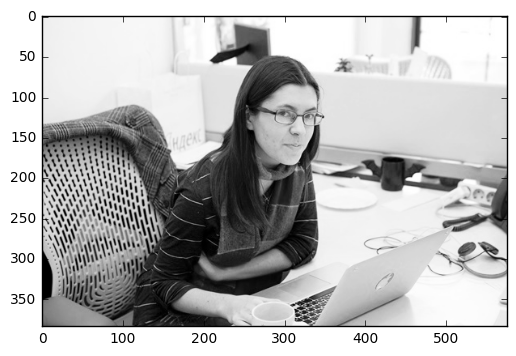

In [31]:
imgplot = plt.imshow(img, cmap='Greys_r')

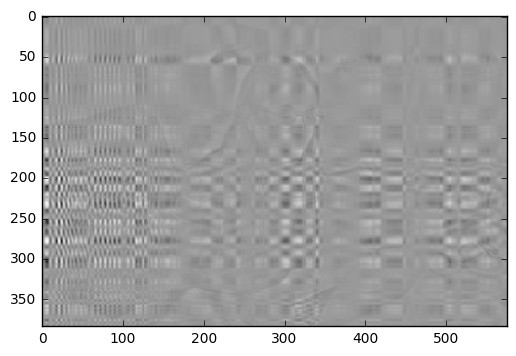

In [155]:
x, y = img.shape
U, S, Vt = sp.linalg.svd(img)

def plot_n_components(i, j):
    u = U[:, i:j].reshape((x, j - i))
    v = Vt[i:j].reshape((j - i, y))
    p = (u * S[0:j - i]).dot(v)
    plt.imshow(p, cmap='Greys_r')
    
#plot_n_components(0, 1)
#plot_n_components(0, 20)
#plot_n_components(0, 100)
plot_n_components(20, 100)
#plot_n_components(20, 384)

#plot_n_components(0, 100)

221184 96000


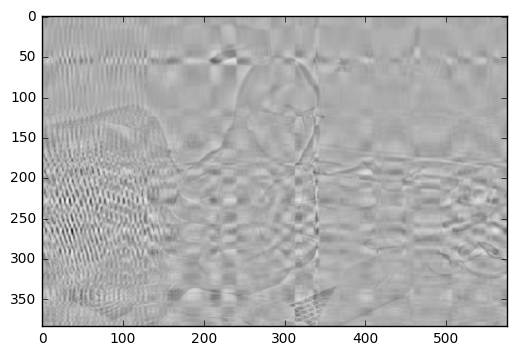

In [156]:
#centric
x, y = img.shape
mean = np.mean(img)
img_ = img - mean
U, S, Vt = sp.linalg.svd(img_)

def plot_n_components(i, j):
    u = U[:, i:j].reshape((x, j - i))
    v = Vt[i:j].reshape((j - i, y))
    p = (u * S[0:j - i]).dot(v)
    p = p + mean
    plt.imshow(p, cmap='Greys_r')
    
#plot_n_components(0, 1)
#plot_n_components(0, 20)
#plot_n_components(0, 50)
plot_n_components(20, 100)
#plot_n_components(20, 384)


#plot_n_components(0, 100)

print(x * y, (x + y) * 100)

**Анализ** ( и ремарочка: путём снятия комментариев с определенных строчек кода можно увидеть всевозможные результаты)

В общем и целом, при приближении лишь по первой компоненте получаем основные скопления цветов. Сравнивая с оригиналом угадываются области фотографии. Возможно для иных картинок бы подошло, но нам мало.

Первые 20 и первые 50 конечно улучшают друг дружку. При использовании компонент от 100 и до конца можно увидеть, что это лишь малые штрихи. Основная информация хорошо отражена в первых 100. Будем их использовать. Выйгрыш неплох: 221184 элементов против 96000. Больше, чем в два раза. И качество приемлемое.

Цетрирование влияет на приближение по первой компоненте. Далее уже отличий на глаз не увидеть, если брать основные, но вот если смотреть на неосновные, то разница есть, центрирование лучше.

## 4. Снижение размерности с помощью SVD (4 балла)

Загрузите со страницы курса файлы `messages_texts.txt`, `messages_features.txt` и `messages_vectorized.mtx`.

**Внимание!** Не пытайтесь открыть файл `messages_vectorized.txt` в блокноте или, тем более, распечатать его в IPython ноутбуке. Сначала посмотрите на его объём.

* `messages_texts.txt` содержит некоторое количество текстовых сообщений на английском языке. Сообщение номер k начинается с заголовка post_number_k.
* `messages_features.txt` содержит список пар `(слово, номер соответствующего признака)` для всех слов, которые содержатся в теле сообщений, кроме самых употребительных из списка `stopwords.words("english")`
* `messages_vectorized.mtx` содержит разреженную матрицу, содержащая индексы [tf-idf](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) всех слов из messages_features в каждом сообщении.

*Замечание* Не обязательно парсить файл `messages_texts.txt`; чтобы найти сообщение с нужным номером, вы можете просто воспользоваться поиском по файлу!

В этом задании вы попробуете представить сообщения векторами небольшой размерности. Идея вот в чём. Изначально каждое сообщение у нас представлена огромным количеством признаков: tf-idf индексами всех слов. SVD позволяет значительную часть информации собрать в нескольких новых признаках; тем самым, сообщения будут представлены достаточно короткими векторами.

Загрузите матрицу `messages_vectorized.mtx`. Поскольку она очень большая, не пытайтесь вычислять полное SVD; вместо этого воспользуйтесь функцией [scipy.linalg.svds](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.linalg.svds.html#scipy.sparse.linalg.svds), которая вычисляет $k$ старших сингулярных значений и векторов. Возьмите $k = 6$ и визуализуйте сообщения в пространстве первых трёх новых признаков. Какие геометричские особенности датасета становятся видны? Стоят ли за этим какие-то содержательные закономерности? Возможно, придётся запустить несколько раз, чтобы получилась хорошая картинка (а она действительно хорошая!).

Какой методологический недочёт был допущен при создании матрицы `messages_vectorized.mat`? Как он повлиял на поведение SVD?

Попытайтесь выяснить, какие из исходных признаков (то есть какие слова) вносят наибольший вклад в три новых признака.

Сравните результаты с тем, что получилось бы, если воспользоваться [случайными гауссовскими проекциями](http://scikit-learn.org/stable/modules/random_projection.html). Они вызываются следующими заклинаниями:

In [ ]:
X = # Your matrix
transformer = random_projection.GaussianRandomProjection(n_components='''how many?''')
X_new = transformer.fit_transform(X)

**Центрировать данные** можно с помощью функции `sklearn.preprocessing.scale`:

In [ ]:
from sklearn.preprocessing import scale
scale(X, with_mean = True, with_std=False, axis=0)

*P.S.* Если оперативная память вам позволит (кажется, 2Гб должно хватить), можете всё-таки попробовать сделать полное SVD и сравнить полученную картинку с той, что выдаёт `svds`.

In [1]:
import scipy.io as sio
A = sio.mmread(r'messages_vectorized.mtx')

In [73]:
from mpl_toolkits.mplot3d import Axes3D
import pylab
from sklearn import random_projection

In [119]:
U, s, Vt = spla.svds(A)

B = U.dot(np.diag(s))

X = A
transformer = random_projection.GaussianRandomProjection(n_components=6)
X_new = transformer.fit_transform(X)

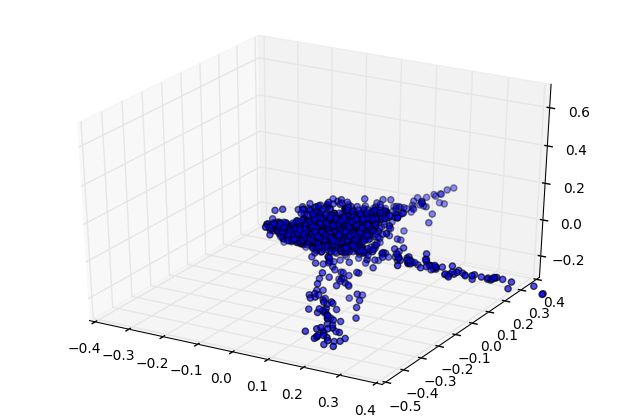

svd


In [123]:
fig = pylab.figure()
ax = Axes3D(fig)
ax.scatter(B[:, 0], B[:, 1], B[:, 2], zdir="x")
plt.show()
print('svd')

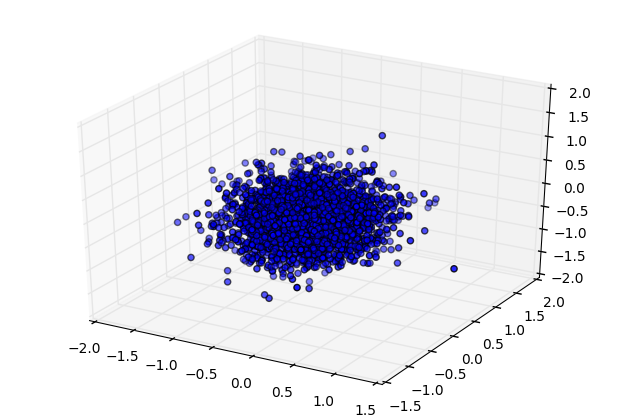

Gaussian random projection


In [121]:
fig = pylab.figure()
ax = Axes3D(fig)
ax.scatter(X_new[:, 0], X_new[:, 1], X_new[:, 2], zdir="x")
plt.show()
print('Gaussian random projection')

**Анализ** Как видим svd цепляет лучи не самых распространенных признаков. Вероятно это сообщения специфических тем и содержания и нечаянно попались под наше разложение в первых рядах. Строго говоря, датасет поучился, вероятно, разрозненным по темам, оттого по трем признакам сложно оценить его особенности. Случайные Гауссовы проекции показали себя как нельзя лучше и выдают конкретно выраженный эллипсоид с парой выбросов.

$AV = U\Sigma$

Откуда получим, что чтобы узнать наиболее важные признаки в трёх новых, нужно исследовать столбцы матрицы $V$.

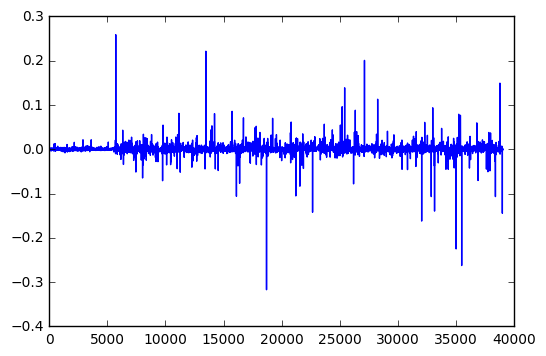

In [150]:
plt.plot(Vt[0]) # cos it is transposed!!!

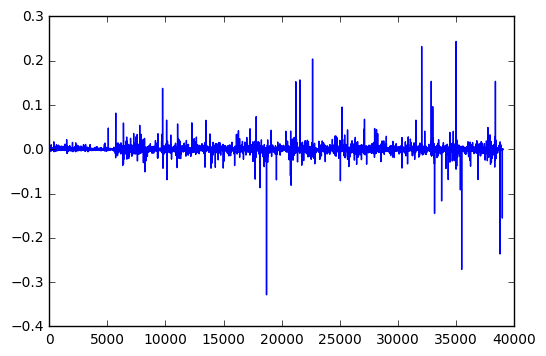

In [141]:
plt.plot(Vt[1])

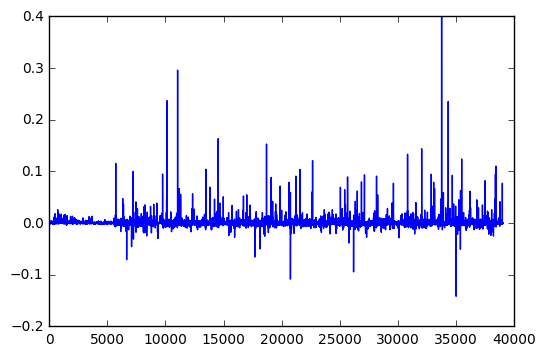

In [142]:
plt.plot(Vt[2])

По этим графикам можно заметить, какие элементы учавствуют более активно в первом, втором и третьем признаке соответственно. Можно еще найти эти коэффициенты и достать значения слов из текстового файла, но мне немножко лень.

## 5. Низкоранговые приближения своими руками (до 6 баллов)

В этой задаче вам предстоит поразмышлять о низкоранговых приближениях и об их месте в мироздании.

Везде ниже $||\cdot||_2$ --- это операторная $l_2$-норма.

Зафиксируем некоторое $\varepsilon > 0$. Найти низкоранговое приближение матрицы $A$ с точностью $\varepsilon$ --- значит найти такую матрицу $Q$ с $k = k(\varepsilon)$ ортонормированными столбцами, для которой
$$
\begin{matrix}
\phantom{AAAAAAAAAAAAAAAAA} &
||A - QQ^TA||_2 < \varepsilon & \phantom{AAAAAAAAAAAAaa}(1)\end{matrix}$$
В этом случае линейная оболочка столбцов матрицы $Q$ является в каком-то смысле приближённым образом $A$.

Если ранг $k$ нам из каких-то соображений известен, то можно воспользоваться, например, сингулярным разложением. А если нет? Есть несколько способов этот ранг найти; мы предлагаем вам поэкспериментировать с одним из них.

Идея проста: если мы возьмём образы достаточно большого количества случайных векторов (обычно их берут из стандартного нормального распределения), с хорошей вероятностью их линейная оболочка будет приближать образ с нужной нам точностью. Главный вопрос в том, когда имеет смысл остановиться. И здесь помогает следующая

**Теорема.** Пусть $B\in\mathrm{Mat}_{m\times n}$ --- некоторая матрица, $\omega_1,\ldots,\omega_r$ --- случайные векторы, независимо выбранные из стандартного нормального распределения. Тогда
$$P\left\{||B||\leqslant 10\sqrt{\frac{2}{\pi}}\max_i{||B\omega_i||}\right\} \geqslant 1 - \min(m,n)\cdot10^{-r}$$


Следующий алгоритм позволяет для матрицы $A$ размера $m\times n$ найти ортогональную матрицу $Q$, такую что

$$P\left\{||(E - QQ^T)A||_2\leqslant\varepsilon\right\} \geqslant 1 - \min\{m,n\}\cdot10^{-r}$$

---

\begin{align*}
&\textbf{Алгоритм}\\
&\mbox{Draw }\omega^{(1)},\ldots,\omega^{(r)}\sim\mathcal{N}(0, E)\\
&\mbox{Compute }y^{(i)} = A\omega^{(i)}\\
&Q^{(0)} = []\mbox{ (an empty matrix $m\times 0$)}\\
&j = 0\\
&\mbox{while }\max\left\{|y^{(j+1)}|,\ldots, |y^{(j+r)}|\right\} > \frac{\varepsilon}{10\sqrt{2/\pi}}:\\
&\qquad j = j + 1\\
&\qquad y^{(j)} = \left(E - Q^{(j-1)}(Q^{(j-1)})^T\right)y^{(j)}\\
&\qquad q^{(j)} = \frac{y^{(j)}}{|y^{(j)}|}\\
&\qquad Q^{(j)} = \left[Q^{(j-1)}\, q^{(j)}\right]\mbox{ (add new column)}\\
&\qquad \mbox{Draw }\omega^{(j + r)}\sim\mathcal{N}(0, E)\\
&\qquad y^{(j + r)} = \left(E - Q^{(j)}(Q^{(j)})^T\right)A\omega^{(j + r)}\\
&\qquad \mbox{for }i = (j + 1), (j + 2), . . . , (j + r − 1):\\
&\qquad\qquad y^{(i)} = y^{(i)} - (q^{(j)}, y^{(i)})q^{(j)}\\
&\mbox{return } Q^{(j)} 
\end{align*}

---

**Основное задание.** Напишите функцию `find_approximate(A, eps)` (у неё могут быть и другие аргументы, если вам это кажется необходимым), находящую для данной матрицы $A$ и уровня точности $\varepsilon$ матрицу $Q$, удовлетворяющую условию (1). Поэкспериментируйте с матрицами разного размера. Получается ли ошибка $||A - QQ^TA||_2$ достаточно малой?

**Дополнительные вопросы:**

1. Каков вообще (геометрический? линейно алгебраический?) смысл неравенства $||A - QQ^TA||_2 < \varepsilon$? Что мы имеем в виду говоря, что линейная оболочка столбцов матрицы $Q$ является приближённым образом $A$? Кратко (но убедительно:)) объясните, почему предложенный алгоритм действительно делает свою работу.

2. Как построить приближённый SVD, если у нас уже имеется матрица $Q$, удовлетворяющая условию (1)? Найдите этим способом сингулярное разложение матрицы Гильберта и сравните его с вычисленным с помощью библиотечной функции `scipy.linalg.svd`. Удаётся ли вашей функции обогнать по времени библиотечную?

3. Зачастую при поиске низкорангового приближения фиксированного ранга $k$ для матрицы $A$ работают даже не с ней. а с матрицей $(AA^T)^qA$, где $q$ --- небольшое натуральное число (скажем, $2$ или $3$). Зачем это нужно? В каких случаях это оправдано?

4. У функции `make_regression` (см. ниже) есть любопытный параметр `effective_rank` (эффективный ранг). Попробуйте разобраться, что это такое. Можете попробовать дать его определение.

За основное задание можно получить не более 3 баллов; остальные 3 вы сможете набрать, ответив на дополнительные вопросы.

**В помощь хозяйке:**

Сгенерировать матрицу $X$ размера $m\times n$ с эффективным рангом $k$ можно с помощью команды

`X, y = make_regression(n_samples=m, n_features=n, n_informative=n, n_targets=1, bias=0.0, \
                       effective_rank=k, tail_strength=..., noise=0.0, shuffle=True, coef=False, random_state=None)`

Чтобы она подключилась, введите `from sklearn.datasets import make_regression`

Можете поэкспериментировать со значением `tail_strength`.

In [152]:
def approximate_orthogonal(A, eps):
    m, n = A.shape
    E = np.identity(m)
    r = np.linalg.matrix_rank(A)
    W = np.random.randn(n, r)
    Y = A.dot(W)
    Q = np.empty((m, 0))
    while max(sp.linalg.norm(Y, axis = 0)) > eps / (10*(2*pi)**(1/2)):
        y = Y[:, 0]
        y = (np.identity(m) - Q.dot(Q.T)).dot(y)
        q = (y / sp.linalg.norm(y)).reshape(m, 1)
        Q = np.append(Q, q, axis = 1)
        w = np.random.rand(n)
        y_ij = (np.identity(m) - Q.dot(Q.T)).dot(A.dot(w))
        for i in range(1, r):
            y_i = Y[:, i].reshape(m, 1)
            sub =  q.dot(y_i.T).dot(q)
            Y[:, i] -= sub.flatten()
        Y = np.append(Y[:, 1:], y_ij.reshape(m, 1), axis = 1)
    return Q
 
print("for dimensions", 5, 10, 'residual is:')
A = np.random.rand(5, 10)
Q = approximate_orthogonal(A, 1e-5)
print(sp.linalg.norm(A - Q.dot(Q.T).dot(A)))

print("for dimensions", 20, 50, 'residual is:')
A = np.random.rand(20, 50)
Q = approximate_orthogonal(A, 1e-5)
print(sp.linalg.norm(A - Q.dot(Q.T).dot(A)))

print("for dimensions", 500, 500, 'residual is:')
A = np.random.rand(500, 500)
Q = approximate_orthogonal(A, 1e-5)
print(sp.linalg.norm(A - Q.dot(Q.T).dot(A)))

for dimensions 5 10 residual is:
6.61309717244e-16
for dimensions 20 50 residual is:
3.34911751965e-15
for dimensions 500 500 residual is:
1.20653783015e-13


*Ответы на вопросы*

4)effective_rank определяет число компонент необходимых для эффективной аппроксимации. Тоесть чтобы аппроксимировать с помощью свд, можно брать $k$ компонент и мы не увидим сильной потери качества.

## 6. Blessing of dimensionality (3 балла)

Это в каком-то смысле продолжение задания 3; вы попробуете сжать временной ряд с помощью тензорных разложений (то есть сделать такие же картинки, как вам показывали на семинаре).

Загрузите временной ряд (если интересно, он взят [отсюда](https://www.quandl.com/data/BOE/XUDLNKG-Effective-Exchange-Rate-Index-Norwegian-Krone-1990-Average-100)) из файла `BOE-XUDLNKG.csv`

In [146]:
import pandas as pd

x = pd.read_csv(r'BOE-XUDLNKG.csv')['Value'].as_matrix()
x = x[:10332]

(10332,)

Сожмите его несколькими способами:
- с помощью SVD (трансформировав в матрицу, близкую к квадратной), 
- с помощью HOSVD (трансформировав в тензор валентности 3, по возможности близкий к кубическому) 
- с помощью тензорного поезда.

Постарайтесь не только минимизировать ранги, но и добиться, чтобы относительная ошибка --- то есть $\frac{||x - x'||}{||x||}$ --- в каждом случае была не больше 0,05.

Нарисуйте восстановленные из сжатых тензоров ряды. Во сколько раз в каждом из способов удаётся уменьшить объём хранимых данных?

*Замечание* В этом задании не надо пользоваться никакими специальными библиотеками, только стандартными функциями (например, `np.tensordot`, `np.transpose`, `reshape`, `sla.svd`).